In [1]:
import tensorflow as tf

In [2]:
import os


In [3]:
gpus =tf.config.experimental.list_physical_devices('GPU')

In [4]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [5]:
import cv2
import imghdr


In [14]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
import imghdr
from matplotlib import pyplot as plt

In [7]:
data_dir = 'data'

In [8]:
image_exts = ['jpeg' , 'jpg' , 'bmp' , 'png']

In [9]:

for image_class in os.listdir(data_dir):
    if image_class == '.DS_Store':
        continue
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)
    

EBn6TkrUcAAMbTL.jpg
Genshin-Impact-anime-2-1024x576.png
demon-slayer.jpg
86dOlxn.png
0d2b9-16817526633361-1920.jpg
rakkyo-header.png
4429152377fa43c89634c1d79fa57007.jpg
02018802220.jpg
04-fate-stay-night-heavens-feel-ufotable-anime.jpg
images31.jpg
fatezero.jpg
God-Eater-2-1-1024x576.jpg
96569b4585a0d5ccfe4131f878aebe941344604736_full.jpg
demon-slayer-tanjirou-kamado-2-courtesy-funimation2000x1270.jpg
eM1IR3x7isJBbP2zyDZVW7AV0KPRkdItCBc6986G.jpg
q5qf4N2.png
images24.jpg
images30.jpg
fate-stay-night-1125846.jpg
images34.jpg
maxresdefault2.jpg
images20.jpg
demon-slayer2.tiff
07-tales-of-symphonia-the-animation-screenshot.jpg
95ce8-16815449160646-1920.jpg
Genshin-Impact-anime-3-1024x576.png
Genshin-Impact-anime-4-1024x576.png
images21.jpg
images35.jpg
group.png
images23.jpg
a815a259dbaba56d1cbcfa6cf4c36dce-2.jpg
Anime-Best-Ufotable-Series-Ninja-Nonsense-Demon-Slayer-Fate-Zero-Trio.jpg
best-ufotable-anime-e1601122761521-958x575.jpg
390cc977540701ac65efaa137a5054691373652338_full.jpg
13263

In [10]:
for image_class in os.listdir(data_dir):
    if image_class == '.DS_Store':
        continue
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in exst list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))


libpng warning: iCCP: known incorrect sRGB profile


In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 211 files belonging to 2 classes.
Metal device set to: Apple M1


In [13]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

In [16]:
len(batch)

2

In [17]:
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int32)

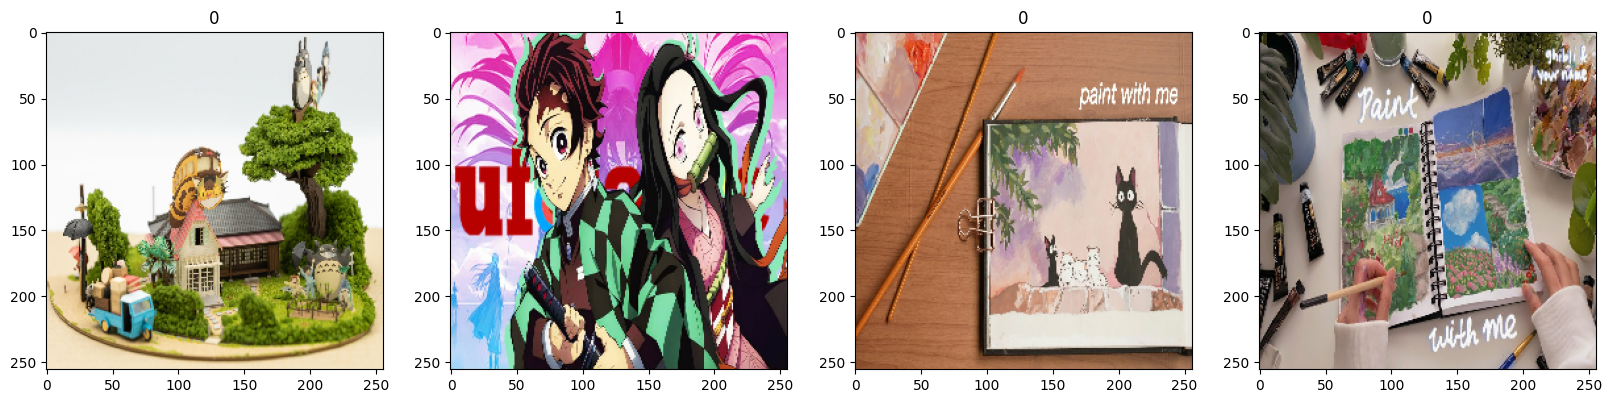

In [18]:
fig,ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
batch[0].max()

255.0

In [20]:
data = data.map(lambda x,y: (x/255,y))

In [21]:
data.as_numpy_iterator().next()[0].min()

2023-04-25 16:22:13.976191: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


0.0

In [22]:
len(data)

7

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [24]:
test_size+train_size + val_size

7

In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256, 256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))






In [29]:
model.compile('adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [31]:
logdir = 'logs'

In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [33]:
hist = model.fit(train, epochs=20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20


2023-04-25 16:22:54.900399: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 1.6691 - accuracy: 0.6016

2023-04-25 16:22:56.490993: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 418ms/step - loss: 1.6691 - accuracy: 0.6016 - val_loss: 0.6917 - val_accuracy: 0.5625
Epoch 2/20


2023-04-25 16:22:57.350448: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.7303 - accuracy: 0.5547

2023-04-25 16:22:58.482974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 377ms/step - loss: 0.7303 - accuracy: 0.5547 - val_loss: 0.6907 - val_accuracy: 0.4688
Epoch 3/20


2023-04-25 16:22:59.315869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.6541 - accuracy: 0.5391

2023-04-25 16:23:00.438914: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 375ms/step - loss: 0.6541 - accuracy: 0.5391 - val_loss: 0.5896 - val_accuracy: 0.8438
Epoch 4/20


2023-04-25 16:23:01.284961: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.5555 - accuracy: 0.7969

2023-04-25 16:23:02.406636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 371ms/step - loss: 0.5555 - accuracy: 0.7969 - val_loss: 0.5515 - val_accuracy: 0.6562
Epoch 5/20


2023-04-25 16:23:03.246699: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.5133 - accuracy: 0.7734

2023-04-25 16:23:04.400319: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 379ms/step - loss: 0.5133 - accuracy: 0.7734 - val_loss: 0.4574 - val_accuracy: 0.8750
Epoch 6/20


2023-04-25 16:23:05.242062: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.4452 - accuracy: 0.8125

2023-04-25 16:23:06.371896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 369ms/step - loss: 0.4452 - accuracy: 0.8125 - val_loss: 0.3258 - val_accuracy: 0.9062
Epoch 7/20


2023-04-25 16:23:07.197774: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3756 - accuracy: 0.8984

2023-04-25 16:23:08.317325: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 367ms/step - loss: 0.3756 - accuracy: 0.8984 - val_loss: 0.3352 - val_accuracy: 0.8750
Epoch 8/20


2023-04-25 16:23:09.142576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3922 - accuracy: 0.8203

2023-04-25 16:23:10.262561: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 365ms/step - loss: 0.3922 - accuracy: 0.8203 - val_loss: 0.4106 - val_accuracy: 0.8125
Epoch 9/20


2023-04-25 16:23:11.091971: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3550 - accuracy: 0.8516

2023-04-25 16:23:12.233308: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 384ms/step - loss: 0.3550 - accuracy: 0.8516 - val_loss: 0.3195 - val_accuracy: 0.8125
Epoch 10/20


2023-04-25 16:23:13.089535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3269 - accuracy: 0.8516

2023-04-25 16:23:14.365999: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 420ms/step - loss: 0.3269 - accuracy: 0.8516 - val_loss: 0.3954 - val_accuracy: 0.8125
Epoch 11/20


2023-04-25 16:23:15.208884: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3113 - accuracy: 0.8516

2023-04-25 16:23:16.328723: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 365ms/step - loss: 0.3113 - accuracy: 0.8516 - val_loss: 0.3215 - val_accuracy: 0.8750
Epoch 12/20


2023-04-25 16:23:17.152470: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3039 - accuracy: 0.8828

2023-04-25 16:23:18.275213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 369ms/step - loss: 0.3039 - accuracy: 0.8828 - val_loss: 0.2609 - val_accuracy: 0.9062
Epoch 13/20


2023-04-25 16:23:19.110114: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.2949 - accuracy: 0.8672

2023-04-25 16:23:20.232430: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 371ms/step - loss: 0.2949 - accuracy: 0.8672 - val_loss: 0.3090 - val_accuracy: 0.8750
Epoch 14/20


2023-04-25 16:23:21.052536: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.2136 - accuracy: 0.9375

2023-04-25 16:23:22.177743: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 382ms/step - loss: 0.2136 - accuracy: 0.9375 - val_loss: 0.2029 - val_accuracy: 0.9531
Epoch 15/20


2023-04-25 16:23:23.057460: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1810 - accuracy: 0.9609

2023-04-25 16:23:24.196326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 368ms/step - loss: 0.1810 - accuracy: 0.9609 - val_loss: 0.1369 - val_accuracy: 0.9062
Epoch 16/20


2023-04-25 16:23:25.032273: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1720 - accuracy: 0.9375

2023-04-25 16:23:26.180330: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 374ms/step - loss: 0.1720 - accuracy: 0.9375 - val_loss: 0.0887 - val_accuracy: 0.9688
Epoch 17/20


2023-04-25 16:23:27.023568: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1603 - accuracy: 0.9219

2023-04-25 16:23:28.197745: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 383ms/step - loss: 0.1603 - accuracy: 0.9219 - val_loss: 0.0977 - val_accuracy: 0.9844
Epoch 18/20


2023-04-25 16:23:29.033339: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1267 - accuracy: 0.9453

2023-04-25 16:23:30.178102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 377ms/step - loss: 0.1267 - accuracy: 0.9453 - val_loss: 0.1516 - val_accuracy: 0.9688
Epoch 19/20


2023-04-25 16:23:31.027996: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0995 - accuracy: 0.9844

2023-04-25 16:23:32.170874: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 382ms/step - loss: 0.0995 - accuracy: 0.9844 - val_loss: 0.1219 - val_accuracy: 0.9688
Epoch 20/20


2023-04-25 16:23:33.035139: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0808 - accuracy: 0.9766

2023-04-25 16:23:34.163115: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 370ms/step - loss: 0.0808 - accuracy: 0.9766 - val_loss: 0.0672 - val_accuracy: 1.0000


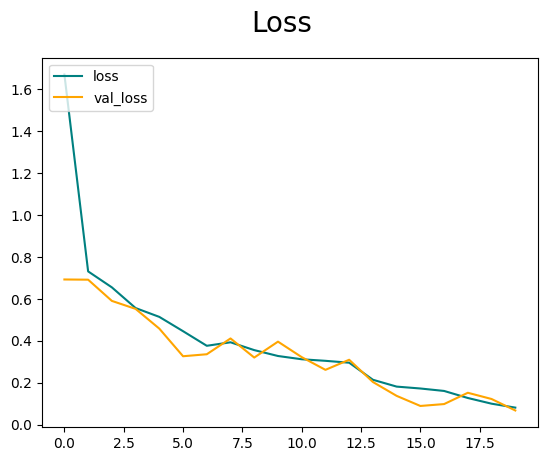

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

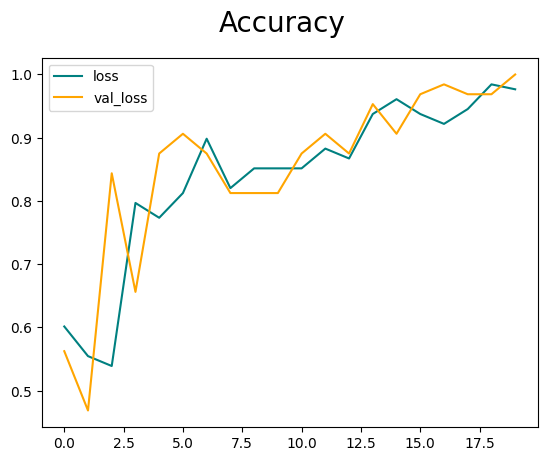

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_loss')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = "upper left")
plt.show()

In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y,yhat)
    

2023-04-25 16:23:56.274110: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 138ms/step


In [41]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision:0.8888888955116272, Recall: 1.0, Accuracy: 0.9473684430122375


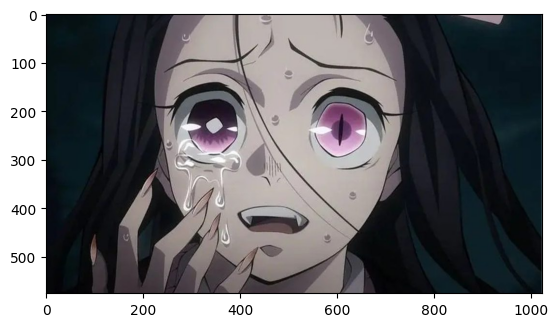

In [48]:
img = cv2.imread('uffu.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

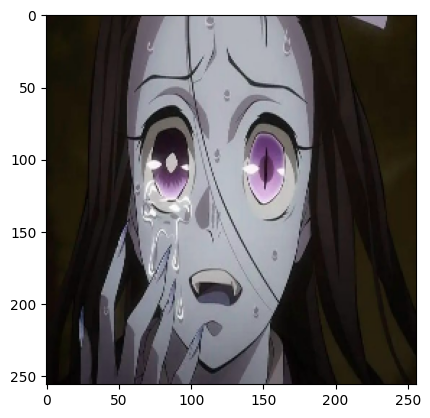

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 41ms/step


In [52]:
yhat

array([[0.9744611]], dtype=float32)

In [53]:
if yhat > 0.5:
    print(f'ufotable')
else:
    print(f'ghibli')
    


ufotable


In [126]:
from tensorflow.keras.models import load_model

In [127]:
model.save(os.path.join('model', 'ufoghibli.h5'))